<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Exercice2_Prediction_conforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data(mtcars)
head(mtcars)
str(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [ ]:
# Régression linéaire
lm_model <- lm(mpg ~ wt, data = mtcars)
summary(lm_model)



Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [ ]:
library(quantreg)
library(SparseM)
# Régression médiane (quantile regression)
rq_model <- rq(mpg ~ wt, tau = 0.5, data = mtcars)
summary(rq_model)

Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”



Call: rq(formula = mpg ~ wt, tau = 0.5, data = mtcars)

tau: [1] 0.5

Coefficients:
            coefficients lower bd upper bd
(Intercept) 34.23224     32.25029 39.74085
wt          -4.53947     -6.47553 -4.16390

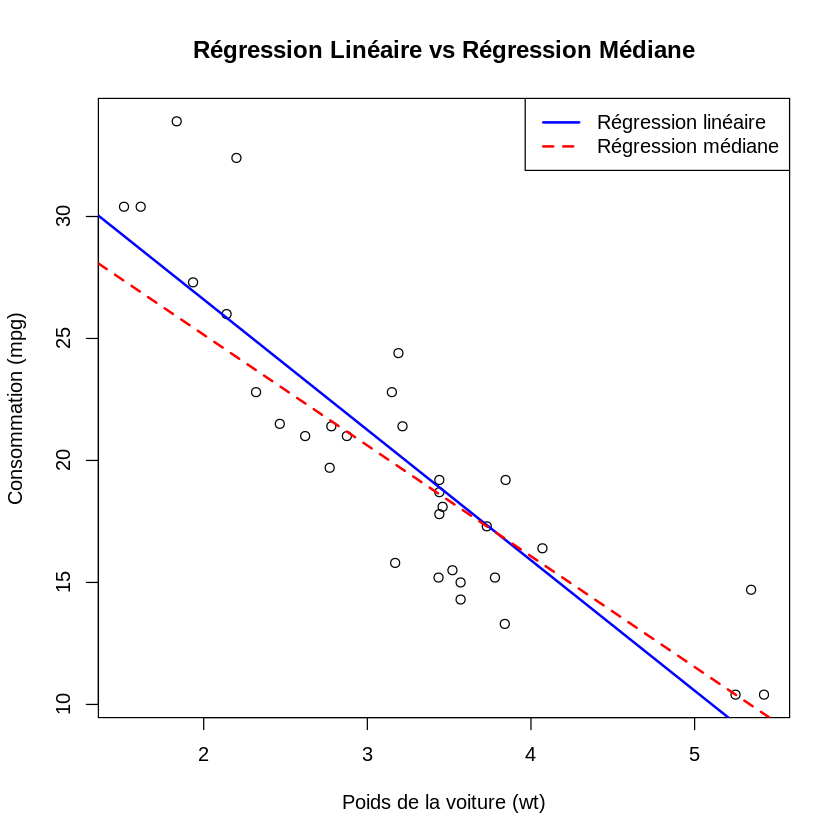

In [ ]:
# Tracer les données et les modèles de régression
plot(mtcars$wt, mtcars$mpg, main = "Régression Linéaire vs Régression Médiane",
     xlab = "Poids de la voiture (wt)", ylab = "Consommation (mpg)")
abline(lm_model, col = "blue", lwd = 2)  # Régression linéaire
abline(rq_model, col = "red", lwd = 2, lty = 2)  # Régression médiane
legend("topright", legend = c("Régression linéaire", "Régression médiane"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)


In [ ]:
# Ajouter des outliers aux données
mtcars_outliers <- mtcars
mtcars_outliers <- rbind(mtcars_outliers, c(10, 8, 500, 3, 120, 3, 1, 1, 4, 1, 4))  # Ajouter un outlier

# Régression linéaire avec outliers
lm_model_outliers <- lm(mpg ~ wt, data = mtcars_outliers)
summary(lm_model_outliers)

# Régression médiane avec outliers
rq_model_outliers <- rq(mpg ~ wt, tau = 0.5, data = mtcars_outliers)
summary(rq_model_outliers)


Call:
lm(formula = mpg ~ wt, data = mtcars_outliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8940  -2.2106   0.1225   1.6774   7.2943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.6881     2.2083  16.614  < 2e-16 ***
wt           -5.2647     0.6596  -7.982 5.19e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.596 on 31 degrees of freedom
Multiple R-squared:  0.6727,	Adjusted R-squared:  0.6621 
F-statistic: 63.71 on 1 and 31 DF,  p-value: 5.185e-09



Call: rq(formula = mpg ~ wt, tau = 0.5, data = mtcars_outliers)

tau: [1] 0.5

Coefficients:
            coefficients lower bd upper bd
(Intercept) 34.23224     32.20305 39.63130
wt          -4.53947     -6.56689 -4.04898

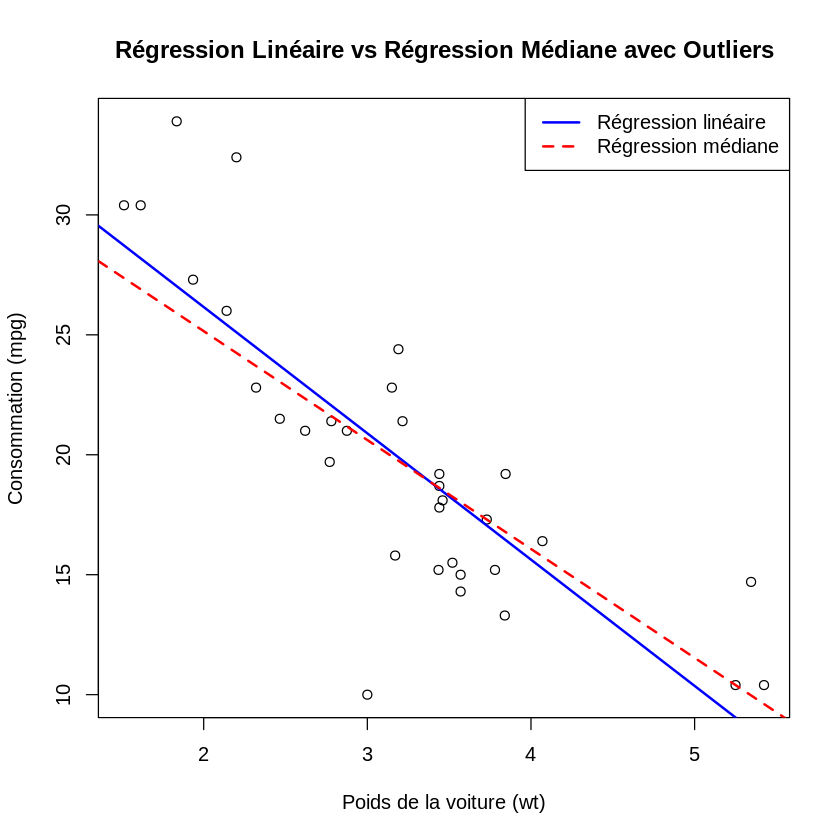

In [ ]:
# Tracer les données et les modèles de régression avec outliers
plot(mtcars_outliers$wt, mtcars_outliers$mpg, main = "Régression Linéaire vs Régression Médiane avec Outliers",
     xlab = "Poids de la voiture (wt)", ylab = "Consommation (mpg)")
abline(lm_model_outliers, col = "blue", lwd = 2)  # Régression linéaire avec outliers
abline(rq_model_outliers, col = "red", lwd = 2, lty = 2)  # Régression médiane avec outliers
legend("topright", legend = c("Régression linéaire", "Régression médiane"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)